# **Linear Regression**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("C:/Users/Asus/Desktop/linear_regression_dataset.csv",sep=";")

In [23]:
df

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


In [24]:
df.head(10)

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


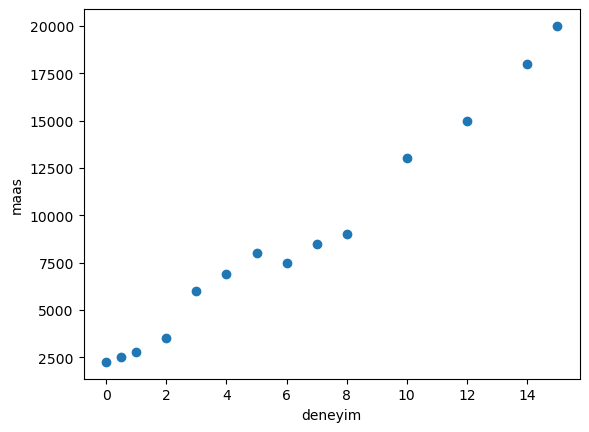

In [25]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show()

y = b0 + b1*x

In [29]:
x = df.deneyim.values  #deneyim ve maas featureları,"values" methoduyla numpy türünde array'e çevrilir.
                                
x

array([ 0.5,  0. ,  1. ,  5. ,  8. ,  4. , 15. ,  7. ,  3. ,  2. , 12. ,
       10. , 14. ,  6. ])

In [30]:
x.shape

(14,)

In [31]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [33]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression() 
        


In [34]:
linear_reg.fit(x,y)        


LinearRegression()

In [35]:
b0 = linear_reg.predict([[0]])
print("b0: ",b0)          

b0:  [[1663.89519747]]


In [36]:
b0_ = linear_reg.intercept_ 
b0 

array([[1663.89519747]])

In [42]:
b1 = linear_reg.coef_
b1

array([[1138.34819698]])

y=bo+b1*x

In [44]:
new_salary = 1663 + 1138*11

In [45]:
print("11 yıllık deneyimi olan birinin maaşı:",new_salary) 


11 yıllık deneyimi olan birinin maaşı: 14181


In [46]:
b11 = linear_reg.predict([[11]])  
b11

array([[14185.72536421]])

In [47]:
y_head = linear_reg.predict(x)

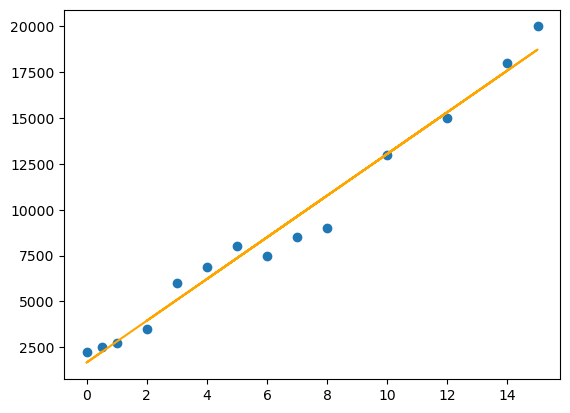

In [50]:
plt.plot(x, y_head, color="orange")
plt.scatter(x,y)
plt.show()

In [51]:
mse = np.square(np.subtract(y,y_head)).mean()


In [52]:
print("Mean Squared Error: ",mse)

Mean Squared Error:  685945.8459614947


In [56]:
from sklearn.metrics import r2_score
print("R Square: ",r2_score(y,y_head))

R Square:  0.9775283164949902


# **Multiple Linear Regression**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv("C:/Users/Asus/Desktop/Advertising.csv")

In [62]:
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [63]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [65]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [66]:
print("Intercept: ", mlr.intercept_)


Intercept:  2.6527896688794996


In [68]:
print("Coefficients:")
list(zip(X, mlr.coef_))

Coefficients:


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893612),
 ('Newspaper', 0.004603078953112044)]

In [69]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [70]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741


In [74]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred_mlr)
print('R square: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Square Error:', MSE)

R square: 89.59
Mean Square Error: 1.8506819941636947


# **Polynomial**

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

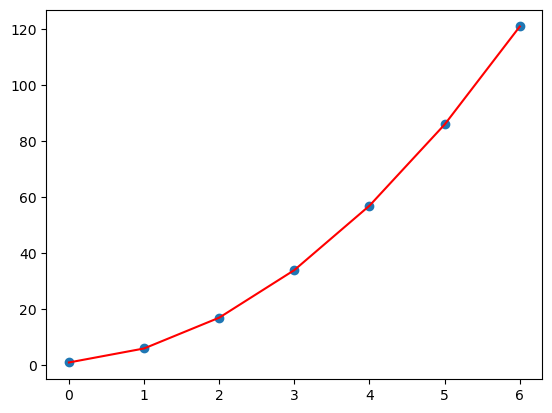

In [79]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 6, 17, 34, 57, 86, 121])


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x_poly), color='red')
plt.show()

In [80]:
x

array([0, 1, 2, 3, 4, 5, 6])

In [81]:
y

array([  1,   6,  17,  34,  57,  86, 121])

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score



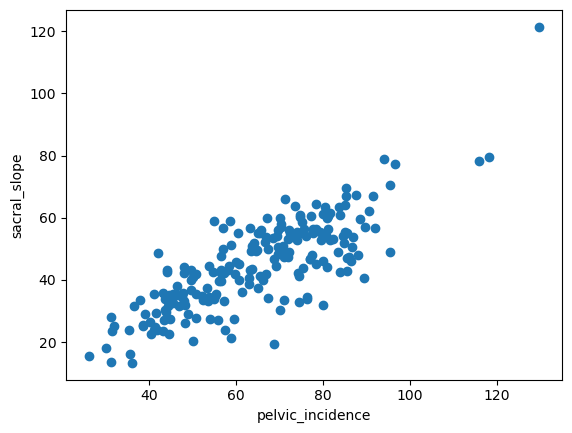

In [85]:
df = pd.read_csv("C:/Users/Asus/Downloads/column_2C_weka.csv")

df.tail()
df.head()

abnormaldata1 = df[df['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()

In [86]:
df.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [87]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [88]:
abnormaldata1= df[df["class"]=="Abnormal"]


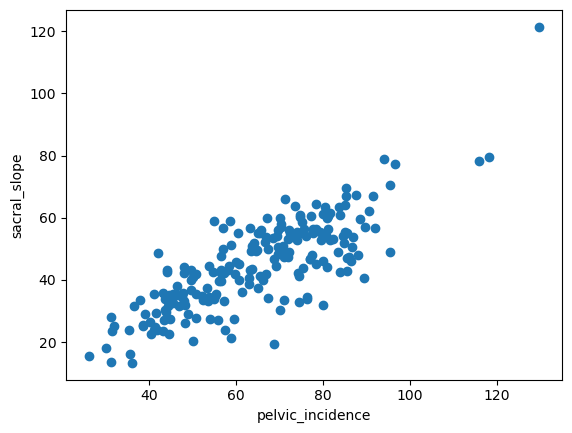

In [90]:
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.4276197994980069


In [94]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))
X_new = np.linspace(0, 132, 200).reshape(200, 1) #0.66

0.46077463955402687


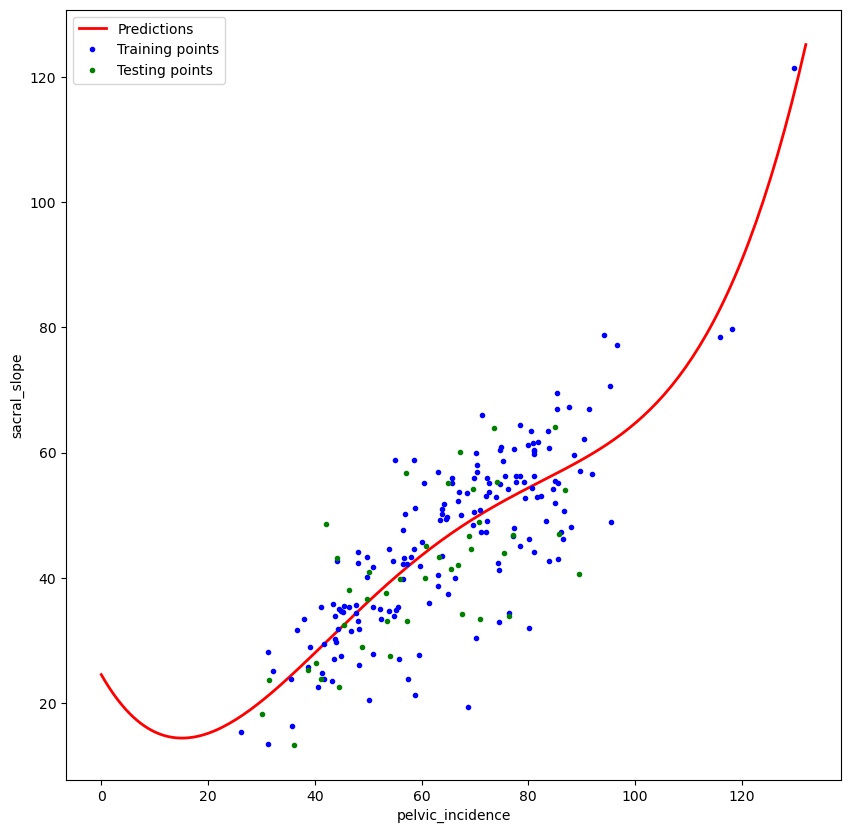

In [95]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



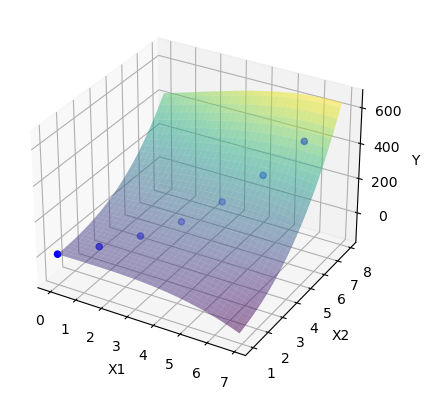

In [98]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 12, 40, 90, 172, 292, 454])

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))

model = LinearRegression()
model.fit(x_poly, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_pred, x2_pred = np.meshgrid(np.arange(0, 7, 0.1), np.arange(1, 8, 0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)

ax.scatter(x1, x2, y, c='blue')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()
